Loading the data...

Checking for missing data...
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Let's take a look at some summary statistics...
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.047300e+06  1.047300e+06   1.047300e+06    1.047300e+06   
mean   2.688335e+01  1.587272e+05   8.748024e+05    8.946201e+05   
std    1.545126e+01  2.649332e+05   2.973320e+06    3.009850e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.216573e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.645370e+04   1.600100e+04    0.000000e+00   
75%    3.900000e+01  2.138531e+05   1.368815e+05    1.748382e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  is

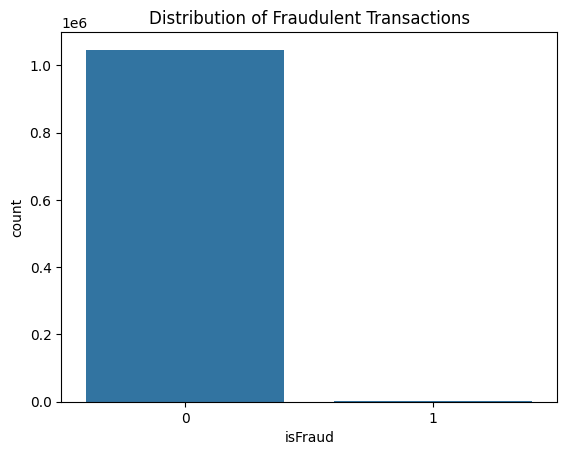


Relationships between features...


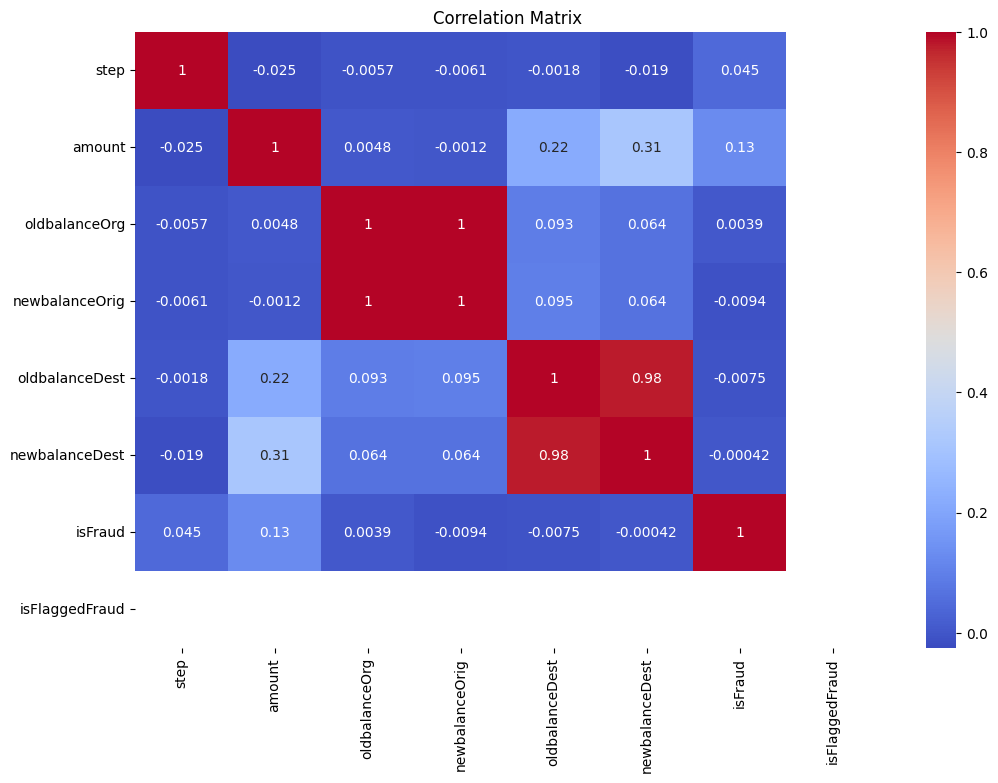


Unique values in 'type' column:
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

Before Encoding:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

E

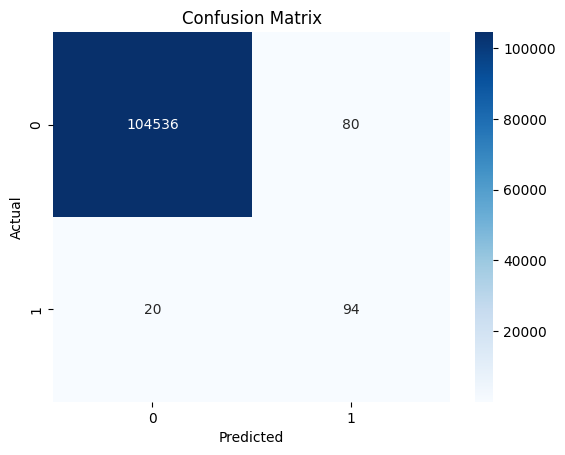


ROC-AUC Score: 0.981370591395902


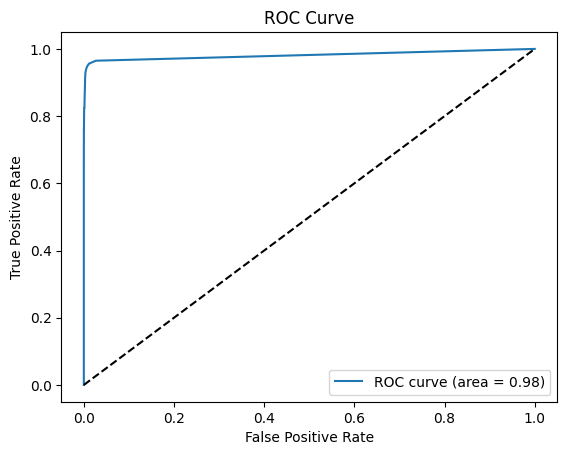


Performing Grid Search for hyperparameter tuning...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_sample

/Users/tanaysaxena/Documents/Coding/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tanaysaxena/Documents/Coding/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tanaysaxena/Documents/Coding/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/tanaysaxena/Documents/Coding/.venv/lib/python3.9/site-packages/sklearn/base.py", line 666

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104616
           1       0.34      0.82      0.48       114

    accuracy                           1.00    104730
   macro avg       0.67      0.91      0.74    104730
weighted avg       1.00      1.00      1.00    104730


Best Model Confusion Matrix:


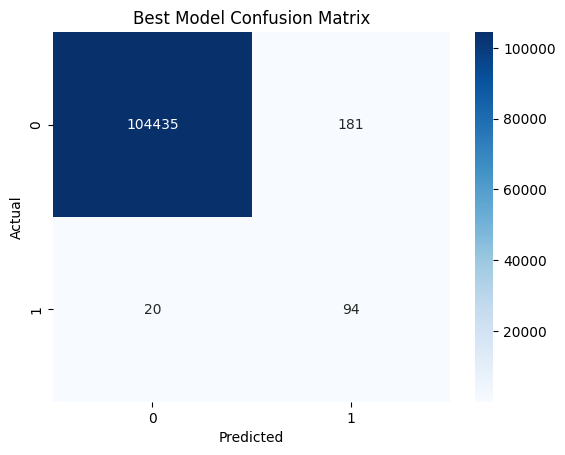


Best Model ROC-AUC Score: 0.983706913437145


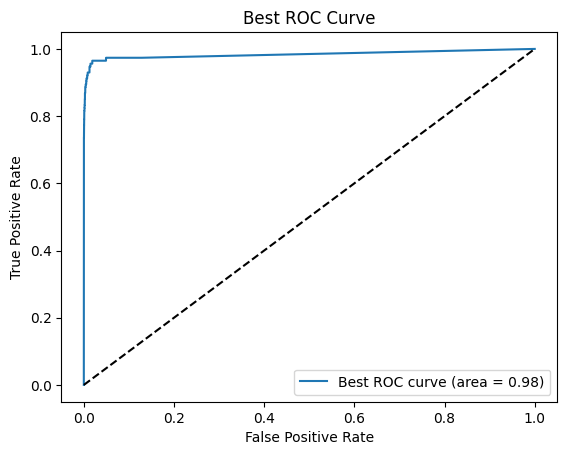


Feature Importances:
                Importance
oldbalanceOrg     0.265319
newbalanceOrig    0.181398
step              0.155371
amount            0.102054
type_TRANSFER     0.077787
type_PAYMENT      0.070836
oldbalanceDest    0.059602
newbalanceDest    0.050560
type_CASH_OUT     0.036745
type_DEBIT        0.000330
isFlaggedFraud    0.000000


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
print("Loading the data...")
try:
    data = pd.read_csv('/Users/tanaysaxena/Documents/Coding/ADG_ML/Task_2/Fraud.csv')
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Check for missing data
print("\nChecking for missing data...")
print(data.isnull().sum())

# Summary statistics
print("\nLet's take a look at some summary statistics...")
print(data.describe())

# Distribution of fraudulent transactions
print("\nDistribution of fraudulent transactions...")
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

# Relationships between features
print("\nRelationships between features...")
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Encoding categorical data
print("\nUnique values in 'type' column:")
print(data['type'].unique())

print("\nBefore Encoding:")
print(data.head())

print("\nEncoding categorical data...")
try:
    data = pd.get_dummies(data, columns=['type'], drop_first=True)
    print("\nAfter Encoding:")
    print(data.head())
except Exception as e:
    print(f"Error encoding categorical data: {e}")
    raise

# Split data into features and target variable
print("\nSplitting data into features and target variable...")
try:
    X = data.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1, errors='ignore')
    y = data['isFraud']
    print("Features and target variable prepared.")
except Exception as e:
    print(f"Error preparing features and target variable: {e}")
    raise

# Reduce dataset size for quicker testing
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)  # Adjust test_size as needed

# Split data into training and testing sets
print("\nSplitting data into training and testing sets...")
try:
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)
    print("Data split into training and testing sets.")
except Exception as e:
    print(f"Error splitting data: {e}")
    raise

# Standardizing features
print("\nStandardizing features...")
try:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features standardized.")
except Exception as e:
    print(f"Error standardizing features: {e}")
    raise

# Address imbalanced class distribution
print("\nAddressing imbalanced class distribution...")
try:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
    print("Class distribution balanced.")
except Exception as e:
    print(f"Error applying SMOTE: {e}")
    raise

# Training Random Forest model
print("\nTraining a Random Forest model...")
try:
    model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)  # Reduced number of trees for faster training
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    print("Random Forest model trained.")
except Exception as e:
    print(f"Error training Random Forest model: {e}")
    raise

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"\nROC-AUC Score: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Hyperparameter tuning with GridSearchCV
print("\nPerforming Grid Search for hyperparameter tuning...")
param_grid = {
    'n_estimators': [10, 20, 50],  # Further reduced number of estimators
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
try:
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_res, y_train_res)
    print(f"Best Parameters: {grid_search.best_params_}")
except Exception as e:
    print(f"Error in Grid Search: {e}")
    raise

best_model = grid_search.best_estimator_
best_model.fit(X_train_res, y_train_res)
y_pred_best = best_model.predict(X_test_scaled)

print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))

print("\nBest Model Confusion Matrix:")
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print(f"\nBest Model ROC-AUC Score: {roc_auc_best}")

fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_best, tpr_best, label=f'Best ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best ROC Curve')
plt.legend(loc='best')
plt.show()

# Feature importances
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


#This gives me the desired output from the required dataset
#if sir you want to run this file then please change the path accordingly to your system and the place where you downloaded the dataset.

